In [2]:
import pandas as pd
import numpy as np
from sklearn import tree

In [3]:
pd.options.display.max_columns = None
# muestro todas las columns de un DF con esta config
titanic = pd.read_csv('./data/titanic.csv')
titanic.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [4]:
#Importamos la función para dividir los datos train_test_split

from sklearn.model_selection import train_test_split

In [5]:
# Seleccionamos por ejemplo, el 30% de los datos para el set de prueba

#set_train, set_test = train_test_split(titanic, test_size=0.3, random_state=45)

### OneHotEncoding o Dumming
Pasar variables categóricas con una codificación binaria en una nueva columna

Hay muchas formas de hacer encoding, las veremos más adelante...

*Esto no siempre se puede hacer, depende del DataSet y del análisis obviamente...*

In [5]:
x = titanic.drop(['Passengerid','2urvived'],axis=1)
# NUNCA utilizar los ID para modelar! Es muy importante removerlos del dataset de entrenamiento!
# Separarlos siempre!
y = titanic['2urvived']

In [7]:
#x = titanic[['Age','Fare','Sex','Embarked']]

In [6]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: 2urvived, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)
# Siempre recordar setear la seed en el notebook para controlar y testear bien los resultados

# OJO, el shuffle es TRUE por defecto en SKL!!! Cuidado pq puede que NO lo quiera hacer en determinados casos...

In [8]:
x_train.head()

,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18
82,28.0,7.7875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1.0,0,0
577,39.0,55.9000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0
537,30.0,106.4250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0
454,28.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0
738,28.0,7.8958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0


In [9]:
x_train[x_train.Embarked.isna()]

,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18
61,38.0,80.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,0
829,62.0,80.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,0


In [10]:
x_train.loc[x_train['Embarked'].isna(),'Embarked'] = 0

In [11]:
y_train.head()

82     1
577    1
537    1
454    0
738    0
Name: 2urvived, dtype: int64

In [12]:
clf = tree.DecisionTreeClassifier()

In [13]:
clf = clf.fit(x_train, y_train)

In [14]:
#tree.plot_tree(clf)

## Actividad

1. Sobre el TEST hacer un PREDICT de la y

2. METRICA: medir que tan bien está prediciendo! CONFUSION MATRIX!!!



In [15]:
y_pred = clf.predict(x_test)

y_pred,np.array(y_test)

(array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 

In [16]:
from sklearn.metrics import confusion_matrix

In [18]:
cf_matrix = confusion_matrix(y_pred,y_test)
cf_matrix

array([[231,  50],
       [ 53,  59]], dtype=int64)

In [19]:
cf_matrix_perc = cf_matrix/np.sum(cf_matrix)
cf_matrix_perc

array([[0.58778626, 0.12722646],
       [0.13486005, 0.15012723]])

In [20]:
cf_matrix_scaled = pd.DataFrame(cf_matrix/cf_matrix.sum(), index=['Actual 0', 'Actual 1'], columns=['Pred 0','Pred 1'])
cf_matrix_scaled

,Pred 0,Pred 1
Actual 0,0.587786,0.127226
Actual 1,0.134860,0.150127


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

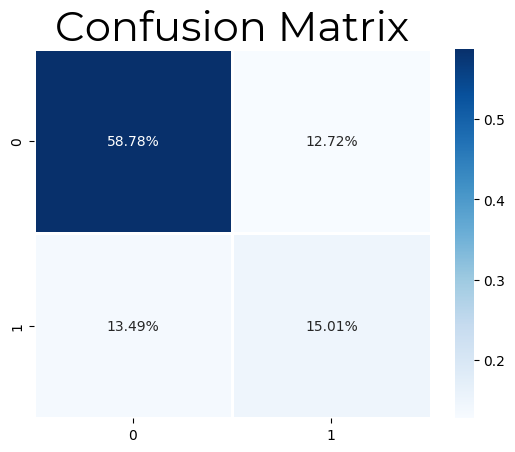

In [22]:
#plt.figure(figsize=(8, 6))
#sns.set(font_scale=1.4)
heatmap = sns.heatmap(cf_matrix_perc, annot=True, fmt='.2%', cmap='Blues', linewidth=2)
#plt.xlabel('Predictions', fontdict={'fontname':'Montserrat'})
#plt.ylabel('Reality', fontdict={'fontname':'Montserrat'})
plt.title('Confusion Matrix', fontdict={'fontname':'Montserrat', 'fontsize':30})
plt.show()

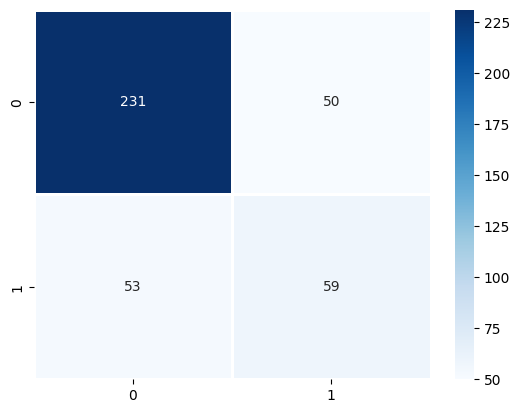

In [23]:
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', linewidth=2)
plt.show()

In [24]:
cf_matrix/np.sum(cf_matrix)

array([[0.58778626, 0.12722646],
       [0.13486005, 0.15012723]])

In [26]:
#tree.plot_tree(clf)

In [25]:
prueba = pd.DataFrame([[0.5,0.5,1],[0.5,0.5,1],[1,1,1]])
prueba

,0,1,2
0,0.5,0.5,1
1,0.5,0.5,1
2,1.0,1.0,1


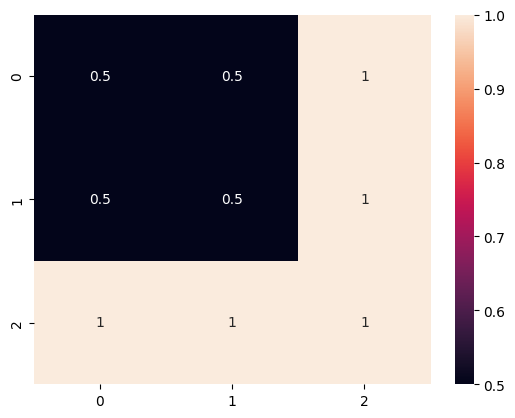

In [26]:
sns.heatmap(prueba, annot=True)
plt.show()

In [27]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
titanic_corr = titanic.select_dtypes(['number']).corr()
titanic_corr

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


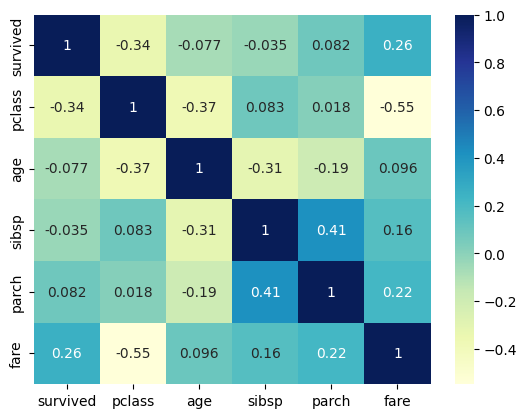

In [29]:
sns.heatmap(titanic_corr,annot=True,cmap='YlGnBu')
plt.show()

In [32]:
#from sklearn.metrics import plot_confusion_matrix

In [30]:
from sklearn import metrics

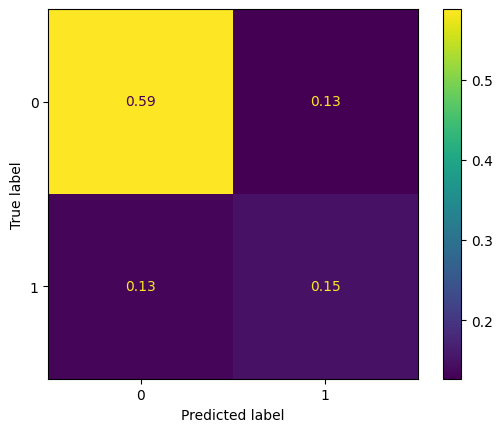

In [31]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix_perc, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [35]:
#pip install seaborn --upgrade

# Tarea:

Problema --> función matemática --> Predicción (y) --> Confussion Matrix

Accuracy, Precision, Recall, F1

### Concepto de MODELO BASE:

Es el modelo de referencia que siempre debemos tener. Es el modelo de referencia que tenemos que tener, y que tenemos que mejorar!

Y tiene que ser básico, no tiene que tener sofisticación ni tanta complejidad matemática...

Tiene que valer para cualquier problema, en este caso de clasificación...

En el caso del fraude, por ejemplo, si hay 90% de fraude: Yo digo que NADIE hace fraude. Y eso tiene Accuracy del 90%!!! Hay que mejorar eso... je

**ESTO SE TIENE QUE PRESENTAR EN TODAS LAS PRÁCTICAS!**

Y sacar la Confussion Matrix y el Accuracy para el MODELO BASE!

1. Accuracy del modelo del otro día
2. Modelo Base Titanic
3. Matriz de confusion
4. Matriz de confus porcentual
5. Accuracy

In [32]:
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: 2urvived, Length: 1309, dtype: int64

In [34]:
y.value_counts(normalize=True)

2urvived
0    0.738732
1    0.261268
Name: proportion, dtype: float64

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7379134860050891

In [43]:
def base_pred(df):
    y_proba0 = y.value_counts(normalize=True)[0]
    y_proba1 = y.value_counts(normalize=True)[1]
    size = df.index.value_counts().size
    y_pred_base = np.random.choice([0, 1], size=size, p=[y_proba0, y_proba1])
    return y_pred_base

In [48]:
base_pred(y_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,

In [53]:
pd.DataFrame(base_pred(y_test)).value_counts(normalize=True)

0    0.73028
1    0.26972
Name: proportion, dtype: float64

1. Predigo --> predecir calcula valor más frecuente!!

Hago train_test_split y separo train y test. Uso el train para entrenar obviamente! Y tengo que correr el modelo base!!! Capo!!!

2. y_pred = predecir aplicado a mi test! predecir(test(sin target!))



In [54]:
def predict(df_base):
    value_max = df_base.value_counts(normalize=True).argmax()
    size = df_base.index.value_counts().size
    y_pred_base = np.random.choice([value_max, abs(1-value_max)], size=size, p=[abs(1-value_max),value_max])
    return y_pred_base

In [72]:
predict(y)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
y.value_counts(normalize=True).argmax()

0

In [57]:
x.index.value_counts().size

1309

In [81]:
def base_pred2(df_test):
    value_max = y_train.value_counts(normalize=True).argmax()
    size = df_test.index.value_counts().size
    y_pred_base = np.random.choice([value_max, abs(1-value_max)], size=size, p=[abs(1-value_max),value_max])
    return y_pred_base

In [76]:
base_pred(y)

array([0, 0, 1, ..., 0, 0, 0])

In [83]:
base_pred2(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
#base_pred(x_test)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(base_pred2(x_test),y_test)

0.72264631043257

In [61]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_pred,y_test)
cf_matrix

array([[231,  50],
       [ 53,  59]], dtype=int64)

In [62]:
cf_matrix_base = confusion_matrix(base_pred2(x_test),y_test)
cf_matrix_base

array([[284, 109],
       [  0,   0]], dtype=int64)

In [63]:
cf_matrix_perc = cf_matrix/np.sum(cf_matrix)
cf_matrix_perc

array([[0.58778626, 0.12722646],
       [0.13486005, 0.15012723]])

In [64]:
cf_matrix_base_perc = cf_matrix_base/np.sum(cf_matrix_base)
cf_matrix_base_perc

array([[0.72264631, 0.27735369],
       [0.        , 0.        ]])

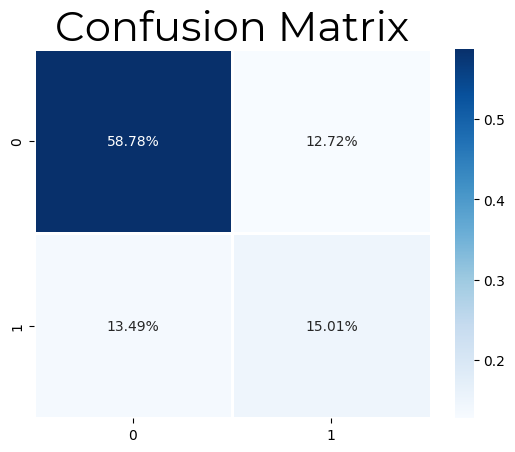

In [65]:
#plt.figure(figsize=(8, 6))
#sns.set(font_scale=1.4)
heatmap = sns.heatmap(cf_matrix_perc, annot=True, fmt='.2%', cmap='Blues', linewidth=2)
#plt.xlabel('Predictions', fontdict={'fontname':'Montserrat'})
#plt.ylabel('Reality', fontdict={'fontname':'Montserrat'})
plt.title('Confusion Matrix', fontdict={'fontname':'Montserrat', 'fontsize':30})
plt.show()

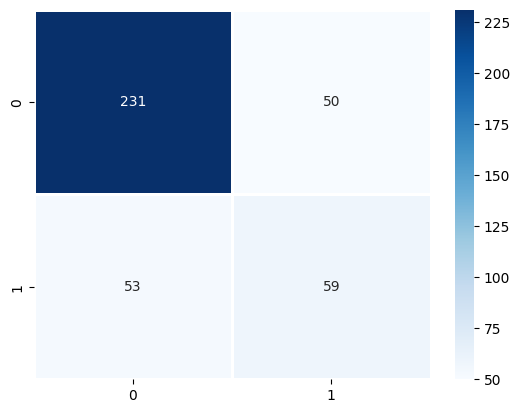

In [66]:
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', linewidth=2)
plt.show()

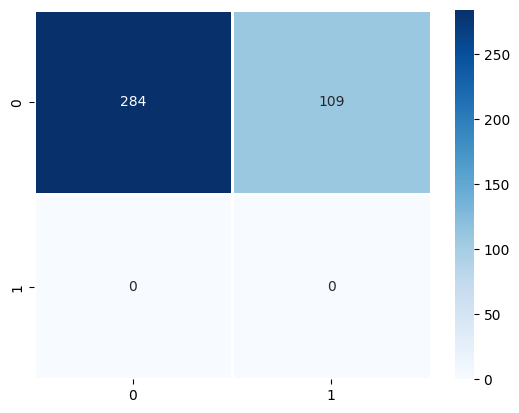

In [67]:
sns.heatmap(cf_matrix_base, annot=True, fmt='d', cmap='Blues', linewidth=2)
plt.show()

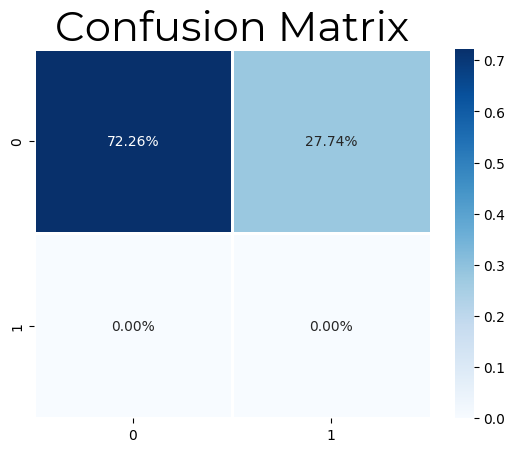

In [68]:
#plt.figure(figsize=(8, 6))
#sns.set(font_scale=1.4)
heatmap = sns.heatmap(cf_matrix_base_perc, annot=True, fmt='.2%', cmap='Blues', linewidth=2)
#plt.xlabel('Predictions', fontdict={'fontname':'Montserrat'})
#plt.ylabel('Reality', fontdict={'fontname':'Montserrat'})
plt.title('Confusion Matrix', fontdict={'fontname':'Montserrat', 'fontsize':30})
plt.show()

In [69]:
accuracy_score(base_pred2(x_test),y_test)

0.72264631043257

In [70]:
accuracy_score(y_pred,y_test)

0.7379134860050891